In [1]:
from IPython.display import IFrame

IFrame(
    "https://matplotlib.org/gallery.html#lines_bars_and_markers",
    width="100%",
    height=500,
)

In [2]:
import matplotlib

print(matplotlib.__version__)
print(matplotlib.get_backend())

3.1.2
module://ipykernel.pylab.backend_inline


In [3]:
%matplotlib inline

# Getting Started 

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
import ipywidgets as widgets
import sys
sys.path.append("..")

In [5]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

In [6]:
plt.show()

## Axes 

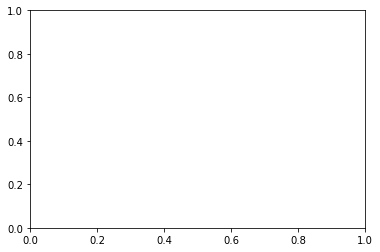

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.show()

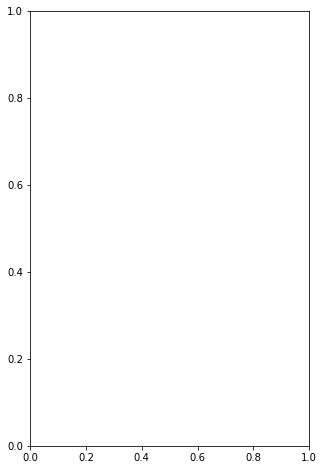

In [8]:
fig = plt.figure(figsize=(5, 8))
ax = fig.add_subplot(111)
plt.show()

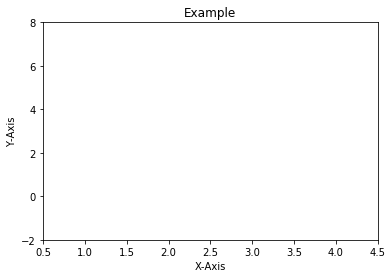

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim([0.5, 4.5])
ax.set_ylim([-2 , 8])
ax.set_title("Example")
ax.set_xlabel("X-Axis")
ax.set_ylabel("Y-Axis")
plt.show()

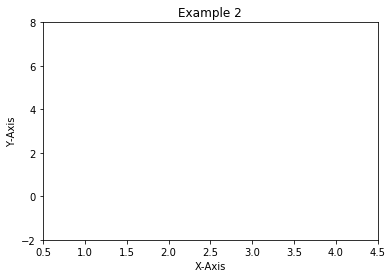

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set(
    xlim=[0.5, 4.5],
    ylim=[-2, 8],
    title="Example 2",
    xlabel="X-Axis",
    ylabel="Y-Axis"
)
plt.show()

# Basic Plotting 

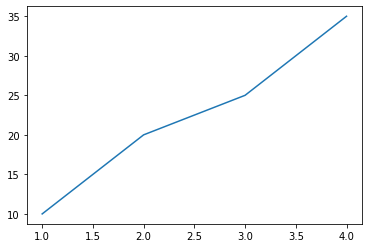

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot([1, 2, 3, 4], [10, 20, 25, 35])
plt.show()

## simple approach 

<function matplotlib.pyplot.show(*args, **kw)>

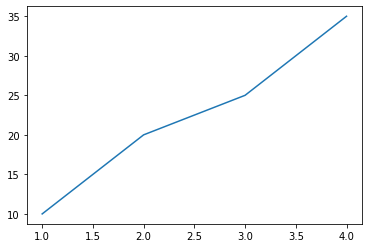

In [12]:
plt.figure()
plt.plot([1, 2, 3, 4], [10, 20, 25, 35])
plt.show

## Multiple Axes

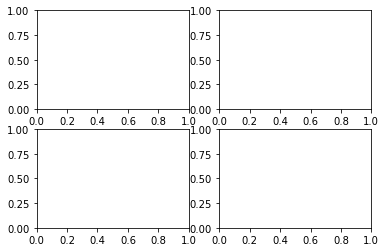

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=2)
plt.show()

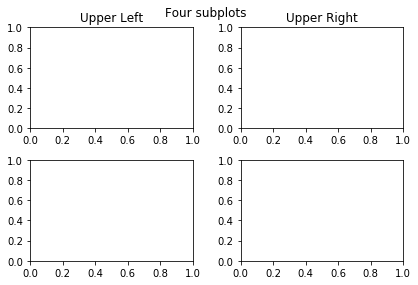

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=2)
axes[0, 0].set(title="Upper Left")
axes[0, 1].set_title("Upper Right")

#tight_layout makes sure titles and tick labels don't overlap
fig.tight_layout()
fig.suptitle("Four subplots")

plt.show()

# Input Data: 1D Series 

## Bar Plots 

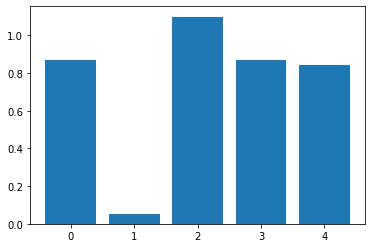

In [15]:
np.random.seed(2)
x = np.arange(5)
y = np.random.random(5) * 2

fig, ax = plt.subplots()
ax.bar(x, y)
plt.show()

In [16]:
x

array([0, 1, 2, 3, 4])

In [17]:
y

array([0.8719898 , 0.05185246, 1.09932496, 0.87064479, 0.8407356 ])

Adding errorbars...

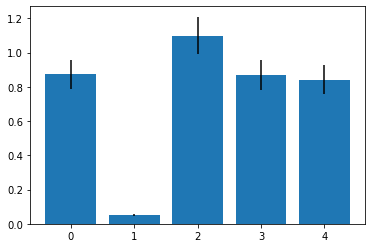

In [18]:
np.random.seed(2)
x = np.arange(5)
y = np.random.random(5)  * 2
error = y * 0.1
fig, ax = plt.subplots()
ax.bar(x, y, yerr=error)
plt.show()

If we have negative values, we can use axhline to draw an axis "spine" to mark the zero line.

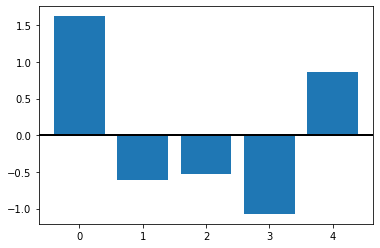

In [19]:
np.random.seed(1)
x = np.arange(5)
y = np.random.randn(5)

fig, ax = plt.subplots()
ax.bar(x, y)
ax.axhline(y=0, color='black', linewidth=2)
plt.show()

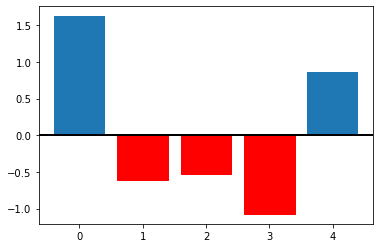

In [20]:
fig, ax = plt.subplots()
vert_bars = ax.bar(x, y) #store the output of .bar call

for bar, height in zip(vert_bars, y):
    if height < 0:
        bar.set(color='red')
        
ax.axhline(y=0, color='black', linewidth=2)

plt.show()

In [21]:
for bar in vert_bars:
    print(bar)

Rectangle(xy=(-0.4, 0), width=0.8, height=1.62435, angle=0)
Rectangle(xy=(0.6, 0), width=0.8, height=-0.611756, angle=0)
Rectangle(xy=(1.6, 0), width=0.8, height=-0.528172, angle=0)
Rectangle(xy=(2.6, 0), width=0.8, height=-1.07297, angle=0)
Rectangle(xy=(3.6, 0), width=0.8, height=0.865408, angle=0)


## Filled Regions 

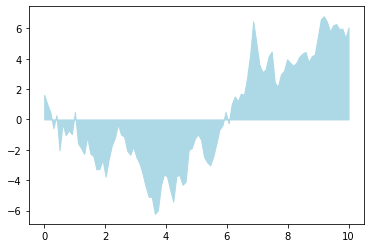

In [22]:
np.random.seed(1)
y = np.random.randn(100).cumsum()
x = np.linspace(0, 10, 100)

fig, ax = plt.subplots()
ax.fill_between(x, y, color='lightblue')
plt.show()

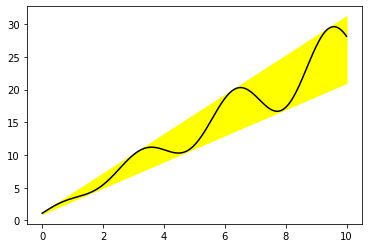

In [23]:
x = np.linspace(0, 10, 200)
y1 = 2 * x + 1
y2 = 3 * x + 1.2
y_mean = 0.5 * x * np.cos(2*x) + 2.5 * x + 1.1

fig, ax = plt.subplots()

#plot the envelope with 'fill_between'
ax.fill_between(x, y1, y2, color='yellow')

#plot the centerline with plot
ax.plot(x, y_mean, color='black')

plt.show()

### data keyword argument 

When using specialized data structures such as Pandas DataFrame and XArray, the input data to be plotted are accessed like dictionary elements. This can get very repetitive and tedious as one types out a plotting command accessing those elements. So, the data keyword argument was added to many of the plotting functions in v1.5. With this feature, one can pass in a single dictionary-like object as data, and use the string key names in the place of the usual input data arguments.
Let's revisit the above example:

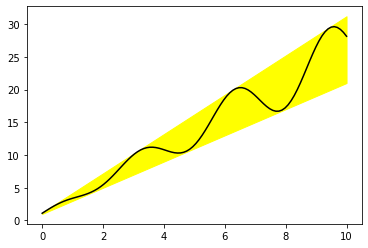

In [24]:
x = np.linspace(0, 10, 100)
data_obj = {
    "x": x,
    "y1": 2 * x +1,
    "y2": 3 * x + 1.2,
    "mean": 0.5 * x * np.cos(2 * x) + 2.5 * x +1.1
}

fig, ax = plt.subplots()

#plot the envelope with 'fill_between'
ax.fill_between("x", "y1", "y2", color='yellow', data=data_obj)

#plot the centerline with plot
ax.plot("x", "mean", color='black', data=data_obj)

plt.show()

# Input Data: 2D Arrays or Images 

In [25]:
arr_2d = np.arange(9).reshape((3, 3))
arr_2d

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

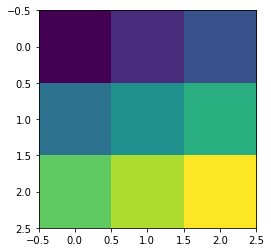

In [26]:
fig, ax = plt.subplots()
ax.imshow(arr_2d)
plt.show()

imshow is used most of the times to display images.

For visualizing matrices, matshow provides better defaults, e.g. axis labelling.

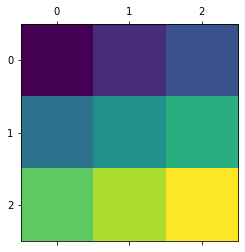

In [27]:
fig, ax = plt.subplots()
ax.matshow(arr_2d)
plt.show()

### Colorbars

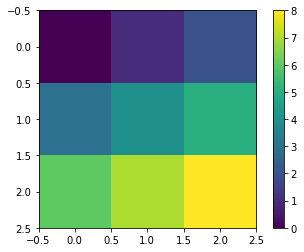

In [28]:
fig, ax = plt.subplots()
im = ax.imshow(arr_2d)
fig.colorbar(im)
plt.show()

In [29]:
arr_2d

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

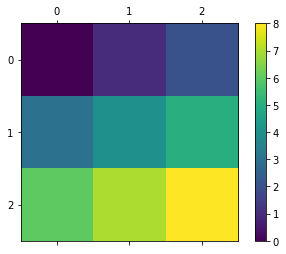

In [30]:
fig, ax = plt.subplots()
im = ax.matshow(arr_2d)
fig.colorbar(im)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

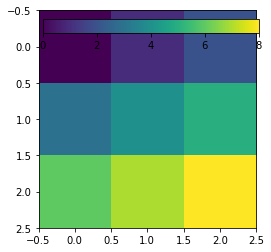

In [31]:
fig, ax = plt.subplots()
cax = fig.add_axes([0.27, 0.8, 0.5, 0.05])

im = ax.imshow(arr_2d)
fig.colorbar(im, cax=cax, orientation='horizontal')
plt.show

### Shared parameters for imshow, pcolormesh, contour, scatter, etc

As we mentioned earlier, any plotting method that creates a ScalarMappable will have some common kwargs. The ones you'll use the most frequently are:

* cmap : The colormap (or name of the colormap) used to display the input. (We'll go over the different colormaps in the next section.)
* vmin : The minimum data value that will correspond to the "bottom" of the colormap (defaults to the minimum of your input data).
* vmax : The maximum data value that will correspond to the "top" of the colormap (defaults to the maximum of your input data).
* norm : A Normalize instance to control how the data values are mapped to the colormap. By default, this will be a linear scaling between vmin and vmax, but other norms are available (e.g. LogNorm, PowerNorm, etc).

vmin and vmax are particularly useful. Quite often, you'll want the colors to be mapped to a set range of data values, which aren't the min/max of your input data. For example, you might want a symmetric ranges of values around 0.

As an example of that, let's use a divergent colormap on some example data. We'll also use interpolation="nearest" to "turn off" interpolation of the cells in the input dataset. Note how the colormap is not centered at zero.

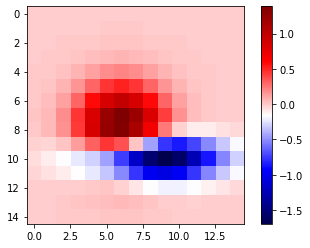

In [32]:
from matplotlib.cbook import get_sample_data
data = np.load(get_sample_data('axes_grid/bivariate_normal.npy'))

fig, ax = plt.subplots()
im = ax.imshow(data, cmap='seismic')
fig.colorbar(im)
plt.show()

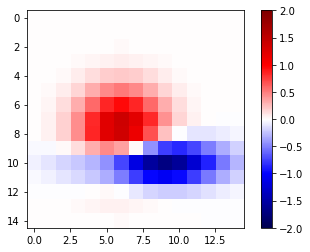

In [33]:
fig, ax = plt.subplots()
im = ax.imshow(data, cmap='seismic',
               vmin=-2, vmax=2)
fig.colorbar(im)
plt.show()

## Scatter for n dimensional data 

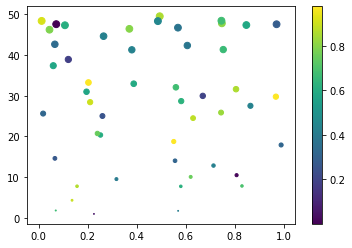

In [34]:
n = 50
x1 = np.random.random(n)
x2 = np.random.random(n) * 50
x3 = np.random.random(n)

y = x1 + x2 + x3
fig, ax = plt.subplots()
sc = ax.scatter(x=x1, y=y, s=x2, c=x3, marker='o')
fig.colorbar(sc)
plt.show()

## Visualizing statistical distributions

Draw samples from a normal distrbution

In [35]:
μ = 0
σ = 1
num_samples = 1000
dist = np.random.normal(μ, σ, num_samples)

Side note on unicode characters as variables. Since Python 3 we can use any unicode character such as μ and σ as variables. This can make sense in scientific programming if strong naming conventions exist. A good example is mean and standard deviation of a normal distribution. To easily obtain common characters you can use latex style and type e.g. \mu followed by tab to obtain μ. However, do not overuse this. Clearly named characters are often easier to read.

## Histrograms 

Histograms a great way to visualize univariate distributions. The data is divided into equally sized bins. Then we count how many data points fall into each bin. Finally, we draw a bar with the width of the corresponding bin and the height of the count.

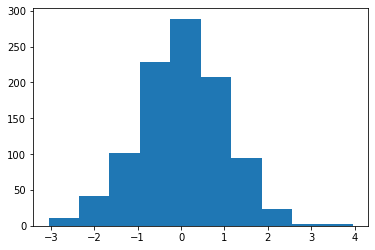

In [36]:
fig, ax = plt.subplots()
ax.hist(dist)
plt.show()

We can control the number of bins.

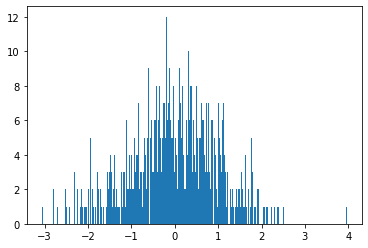

In [37]:
fig, ax = plt.subplots()
ax.hist(dist, bins=500)
plt.show()

Or let it be automatically determined.

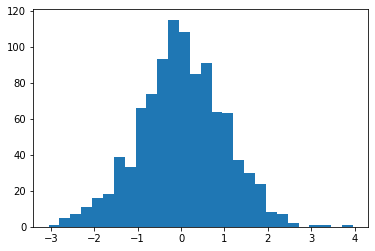

In [38]:
fig, ax = plt.subplots()
ax.hist(dist, bins='auto')
plt.show()

Using density=True will create a normalized histogram that can be interpreted as a probability density.

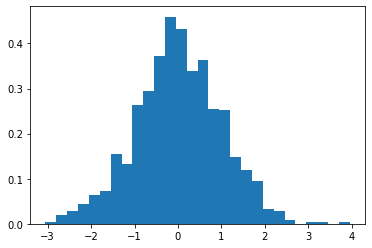

In [39]:
fig, ax = plt.subplots()
ax.hist(dist, bins='auto', density=True)
plt.show()

## Boxplots

Boxplots are another standard way to summarize univariate distributions. The give a compact visual description of important summary statistics. A box is drawn at the 25% and 75% quantile, that is where most of the data is. Additionally, the median is marked by a line inside the box. The whiskers extend 1.5 times the inter quartile range beyond the quartiles. Every point beyond that is drawn individually as a flier or outlier. See also https://flowingdata.com/2008/02/15/how-to-read-and-use-a-box-and-whisker-plot/ for a nice illustration.

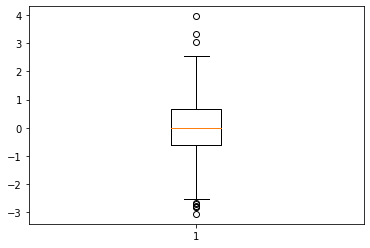

In [40]:
fig, ax = plt.subplots()
ax.boxplot(dist)
plt.show()

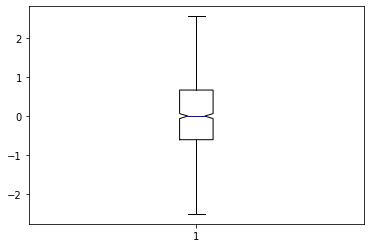

In [41]:
fig, ax = plt.subplots()
ax.boxplot(dist, notch=True, showfliers=False,
           medianprops={'color': 'blue'}, widths=0.1)
plt.show()

In [42]:
import reprlib # This is for obtaining printable versions of large data sets.
means = [0, -1, 2.5, 4.3, -3.6]
sigmas = [1.2, 5, 3, 1.5, 2]
# Each distribution has a different number of samples.
nums = [150, 1000, 100, 200, 500]

dists = [np.random.normal(*args) for args in zip(means, sigmas, nums)]
reprlib.repr(dists)

'[array([ 1.051...23276943e-01]), array([ 2.996...56217073e+00]), array([ 5.861...  3.13430491]), array([1.0326..., 3.01359952]), array([-4.157...83776857e-01])]'

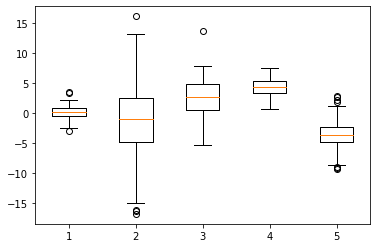

In [43]:
fig, ax = plt.subplots()
ax.boxplot(dists)
plt.show()

## Violinplots 

Violinplots are a third common way to visualize distributions. For violinplots a kernel density estimate is computed for the whole range of data. This gives a smooth estimate of the probabiliy density function underlying the data. The violinplotfunction behaves similar to boxplot.

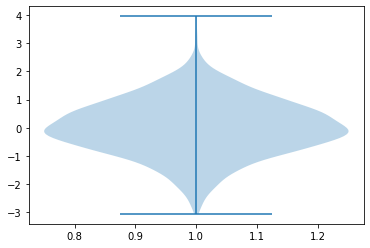

In [44]:
fig, ax = plt.subplots()
ax.violinplot(dist)
plt.show()

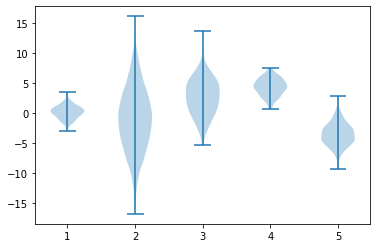

In [45]:
fig, ax = plt.subplots()
ax.violinplot(dists)
plt.show()

## Pie charts 

Pie charts a well known way to visualize categorical distributions.

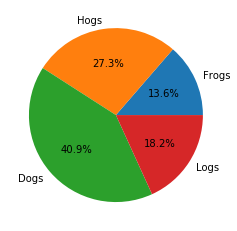

In [46]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 20]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')

plt.show()

## Annotating plots 

Especially for scientific figures, you often want to hightlight the part of a plot that supports your hypothesis. With maplotlib you have the full flexibility to do this using annotate. By default it will just add text at certain x, y coordinate.

[(-2, 2)]

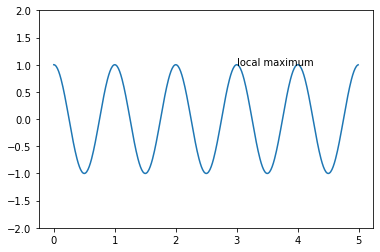

In [47]:
fig, ax = plt.subplots()

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)

# Plot a line and add some simple annotations
line, = ax.plot(t, s)
ax.annotate('local maximum', xy=(3, 1))
ax.set(ylim=(-2, 2))

[(-2, 2)]

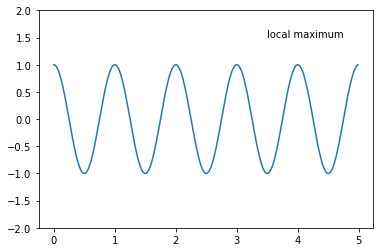

In [48]:
fig, ax = plt.subplots()

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)

line, = ax.plot(t, s)
ax.annotate(
     'local maximum',
     xy=(3, 1),
     xytext=(3.5, 1.5)
)

ax.set(ylim=(-2, 2))

If we have to, we can go very fancy on the arrow styles. See https://matplotlib.org/tutorials/text/annotations.html for a detailed overview.

[(-2, 2)]

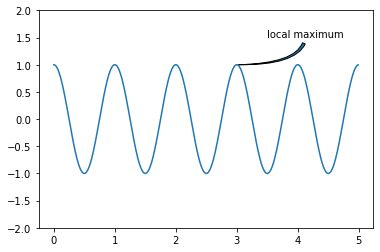

In [49]:
fig, ax = plt.subplots()

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)

# Plot a line and add some simple annotations
line, = ax.plot(t, s)
ax.annotate(
    'local maximum', 
    xy=(3, 1), 
    xytext=(3.5, 1.5),
    arrowprops=dict(arrowstyle='wedge', connectionstyle="angle3")
)

ax.set(ylim=(-2, 2))

[(-2, 2)]

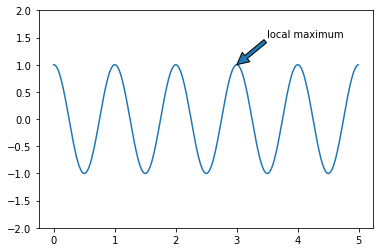

In [50]:
fig, ax = plt.subplots()

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)

# Plot a line and add some simple annotations
line, = ax.plot(t, s)
ax.annotate(
    'local maximum', 
    xy=(3, 1), 
    xytext=(3.5, 1.5),
    arrowprops=dict()
)

ax.set(ylim=(-2, 2))

# How to speak "MPL" 

## Colors 

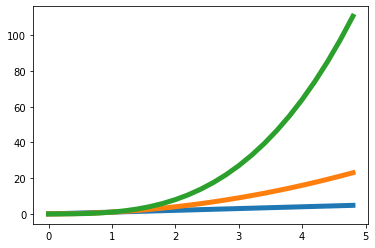

In [51]:
t = np.arange(0.0, 5.0, 0.2)
fig, ax = plt.subplots()
ax.plot(t, t, linewidth=5)
ax.plot(t, t**2, linewidth=5)
ax.plot(t, t**3, linewidth=5)
plt.show()

### Colornames

First, colors can be given as strings. For very basic colors, you can even get away with just a single letter:

* b: blue
* g: green
* r: red
* c: cyan
* m: magenta
* y: yellow
* k: black
* w: white

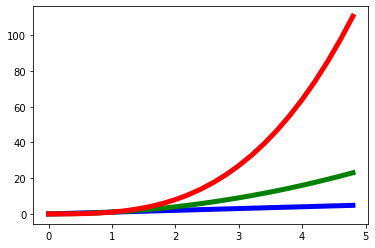

In [52]:
t = np.arange(0.0, 5.0, 0.2)
fig, ax = plt.subplots()
ax.plot(t, t, linewidth=5, color='blue')
ax.plot(t, t**2, linewidth=5, color='g')
ax.plot(t, t**3, linewidth=5, color='red')
plt.show()

### Hex values

Colors can also be specified by supplying a HTML/CSS hex string, such as '#0000FF' for blue. Support for an optional alpha channel was added for v2.0.

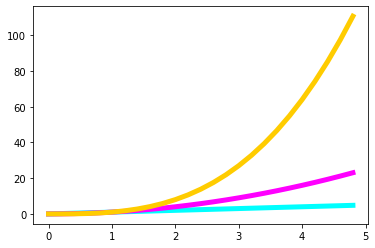

In [53]:
t = np.arange(0.0, 5.0, 0.2)
fig, ax = plt.subplots()
ax.plot(t, t, linewidth=5, color='#00ffff')
ax.plot(t, t**2, linewidth=5, color='#ff00ff')
ax.plot(t, t**3, linewidth=5, color='#ffcc00')
plt.show()

### 256 Shades of Gray

A gray level can be given instead of a color by passing a string representation of a number between 0 and 1, inclusive. '0.0' is black, while '1.0' is white. '0.75' would be a light shade of gray.

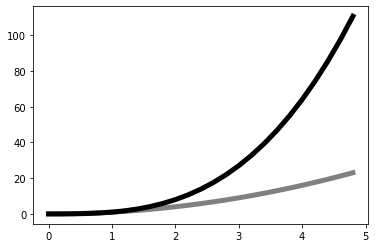

In [54]:
t = np.arange(0.0, 5.0, 0.2)
fig, ax = plt.subplots()
ax.plot(t, t, linewidth=5, color='1.0')
ax.plot(t, t**2, linewidth=5, color='0.5')
ax.plot(t, t**3, linewidth=5, color='0.0')
plt.show()

### RGB tuples 

You may come upon instances where the previous ways of specifying colors do not work. This can sometimes happen in some of the deeper, stranger levels of the library. When all else fails, the universal language of colors for matplotlib is the RGB[A] tuple. This is the "Red", "Green", "Blue", and sometimes "Alpha" tuple of floats in the range of [0, 1]. One means full saturation of that channel, so a red RGBA tuple would be (1.0, 0.0, 0.0, 1.0), whereas a partly transparent green RGBA tuple would be (0.0, 1.0, 0.0, 0.75). The documentation will usually specify whether it accepts RGB or RGBA tuples. Sometimes, a list of tuples would be required for multiple colors, and you can even supply a Nx3 or Nx4 numpy array in such cases.

In functions such as plot() and scatter(), while it may appear that they can take a color specification, what they really need is a "format specification", which includes color as part of the format. Unfortunately, such specifications are string only and so RGB[A] tuples are not supported for such arguments (but you can still pass an RGB[A] tuple for a "color" argument).

Oftentimes there is a separate argument for "alpha" where-ever you can specify a color. The value for "alpha" will usually take precedence over the alpha value in the RGBA tuple. There is no easy way around this inconsistency.

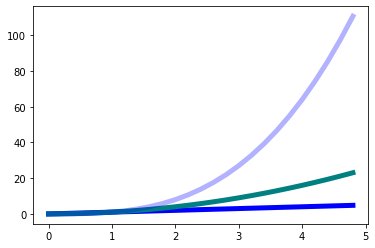

In [55]:
t = np.arange(0.0, 5.0, 0.2)
fig, ax = plt.subplots()
ax.plot(t, t, linewidth=5, color=(0, 0, 1))
ax.plot(t, t**2, linewidth=5, color=(0, 0.5, 0.5))
ax.plot(t, t**3, linewidth=5, color=(0, 0, 1, 0.3))
plt.show()

### Cycle references

With the advent of fancier color cycles coming from the many available styles, users needed a way to reference those colors in the style without explicitly knowing what they are. So, in v2.0, the ability to reference the first 10 iterations of the color cycle was added. Whereever one could specify a color, you can supply a 2 character string of 'C#'. So, 'C0' would be the first color, 'C1' would be the second, and so on and so forth up to 'C9'.

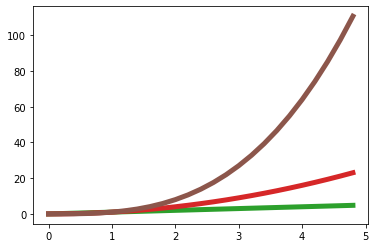

In [56]:
t = np.arange(0.0, 5.0, 0.2)
fig, ax = plt.subplots()
ax.plot(t, t, linewidth=5, color='C2')
ax.plot(t, t**2, linewidth=5, color='C3')
ax.plot(t, t**3, linewidth=5, color='C5')
plt.show()

## Markers 

[Markers](https://matplotlib.org/api/markers_api.html) are commonly used in plot() and scatter() plots, but also show up elsewhere. There is a wide set of markers available, and custom markers can even be specified.

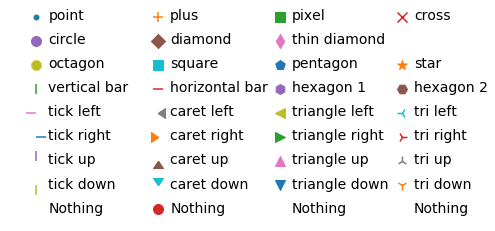

In [57]:
xs, ys = np.mgrid[:4, 9:0:-1]
markers = [".", "+", ",", "x", "o", "D", "d", "", "8", "s", "p", "*", "|", "_", "h", "H", 0, 4, "<", "3",
           1, 5, ">", "4", 2, 6, "^", "2", 3, 7, "v", "1", "None", None, " ", ""]
descripts = ["point", "plus", "pixel", "cross", "circle", "diamond", "thin diamond", "",
             "octagon", "square", "pentagon", "star", "vertical bar", "horizontal bar", "hexagon 1", "hexagon 2",
             "tick left", "caret left", "triangle left", "tri left", "tick right", "caret right", "triangle right", "tri right",
             "tick up", "caret up", "triangle up", "tri up", "tick down", "caret down", "triangle down", "tri down",
             "Nothing", "Nothing", "Nothing", "Nothing"]
fig, ax = plt.subplots(1, 1, figsize=(7.5, 4))
for x, y, m, d in zip(xs.T.flat, ys.T.flat, markers, descripts):
    ax.scatter(x, y, marker=m, s=100)
    ax.text(x + 0.1, y - 0.1, d, size=14)
ax.set_axis_off()
plt.show()

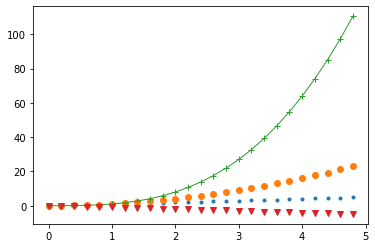

In [58]:
t = np.arange(0.0, 5.0, 0.2)
fig, ax = plt.subplots()
ax.plot(t, t, '.', linewidth=5)
ax.plot(t, t**2, 'o', linewidth=5)
ax.plot(t, t**3, marker='+', linewidth=1)
ax.plot(t, -t, ls='', marker='v', linewidth=5)
plt.show()

## Linestyles 

Line styles are about as commonly used as colors. There are a few predefined linestyles available to use. Note that there are some advanced techniques to specify some custom line styles. Here is an example of a custom dash pattern.

| Linestyle  | description |
| ---------- | ------------|
| '-'        | solid       |
| '--'       | dashed      |
| '-.'       | dashdot     |
| ':'        | dotted      |
| 'None'     | draw nothing|
| ''         | draw nothing|
| "          | draw nothing|


Also, don't mix up ".-" (line with dot markers) and "-." (dash-dot line) when using the plot function!

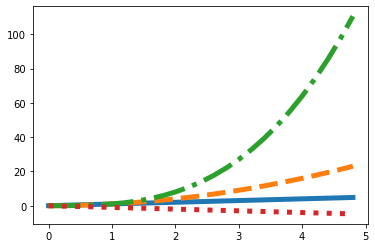

In [59]:
t = np.arange(0.0, 5.0, 0.2)
fig, ax = plt.subplots()
ax.plot(t, t, '-', linewidth=5)
ax.plot(t, t**2, '--', linewidth=5)
ax.plot(t, t**3, '-.', linewidth=5)
ax.plot(t, -t, linestyle=':', linewidth=5)
plt.show()

Many arguments have a short and a long name.

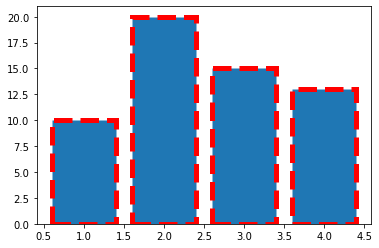

In [60]:
fig, ax = plt.subplots(1, 1)
ax.bar([1, 2, 3, 4], [10, 20, 15, 13], ls='--', ec='r', lw=5)
plt.show()

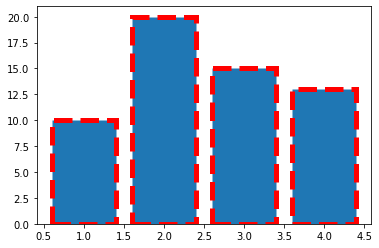

In [61]:
fig, ax = plt.subplots(1, 1)
ax.bar([1, 2, 3, 4], [10, 20, 15, 13], linestyle='--', edgecolor='r', linewidth=5)
plt.show()

Everything combined in the fmt string. Color, marker and linestyle can be specified in a single fmt string argument in that order.

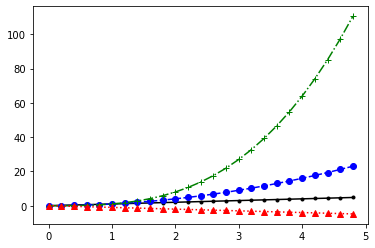

In [62]:
t = np.arange(0.0, 5.0, 0.2)
fig, ax = plt.subplots()
ax.plot(t, t, 'k.-')
ax.plot(t, t**2, 'bo--')
ax.plot(t, t**3, 'g+-.')
ax.plot(t, -t, 'r^:')
plt.show()

## Colormaps

Another very important property of many figures is the colormap. The job of a colormap is to relate a scalar value to a color. In addition to the regular portion of the colormap, an "over", "under" and "bad" color can be optionally defined as well. NaNs will trigger the "bad" part of the colormap.

As we all know, we create figures in order to convey information visually to our readers. There is much care and consideration that have gone into the design of these colormaps. Your choice in which colormap to use depends on what you are displaying. In mpl, the "jet" colormap has historically been used by default, but it will often not be the colormap you would want to use. Much discussion has taken place on the mailing lists with regards to what colormap should be default. The v2.0 release of Matplotlib adopted a new default colormap, 'viridis', along with some other stylistic changes to the defaults.

In [64]:
def plot_cmap(name, value_range=(0, 1)):
    gradient = np.linspace(*value_range, 256)
    gradient = np.vstack((gradient, gradient))
    fig, ax = plt.subplots(figsize=plt.figaspect(0.1))
    ax.imshow(gradient, aspect='auto', cmap=plt.get_cmap(name), vmin=0, vmax=1)
    pos = list(ax.get_position().bounds)
    x_text = pos[0] - 0.01
    y_text = pos[1] + pos[3]/2.
    ax.set_title(name, fontsize=20)
    ax.axis("off")

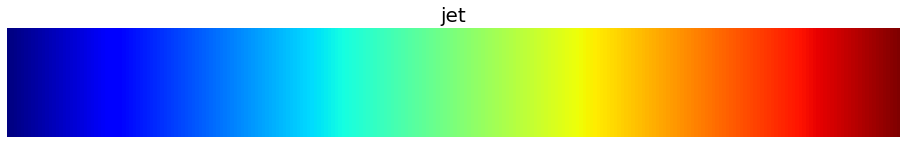

In [65]:
plot_cmap("jet")

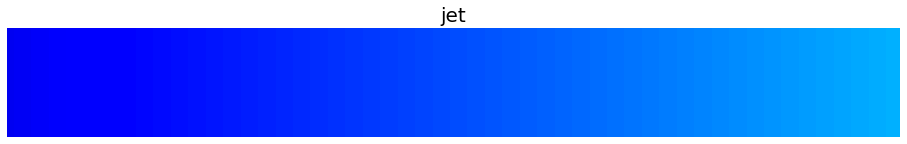

In [66]:
plot_cmap("jet", value_range=(0.1, 0.3))

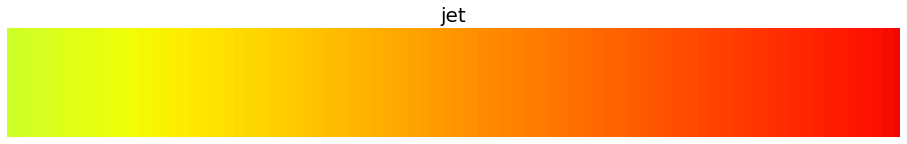

In [67]:
plot_cmap("jet", value_range=(0.6, 0.9))

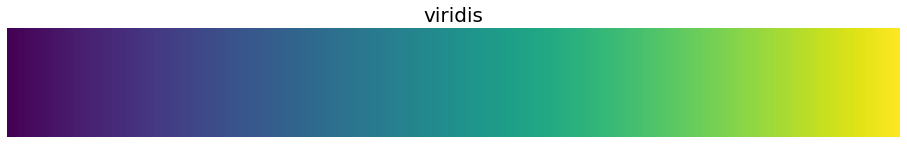

In [68]:
plot_cmap("viridis")

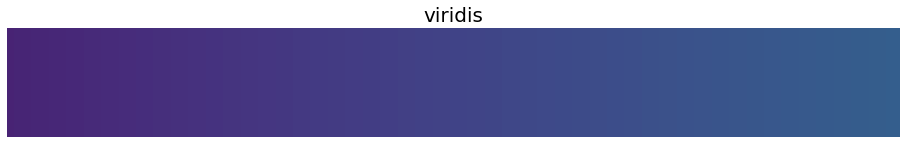

In [69]:
plot_cmap("viridis", value_range=(0.1, 0.3))

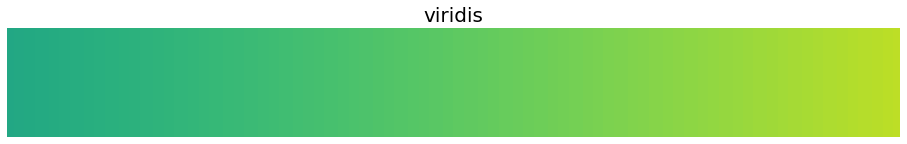

In [70]:
plot_cmap("viridis", value_range=(0.6, 0.9))

Here is the full gallery of all the pre-defined colormaps, organized by the types of data they are usually used for.

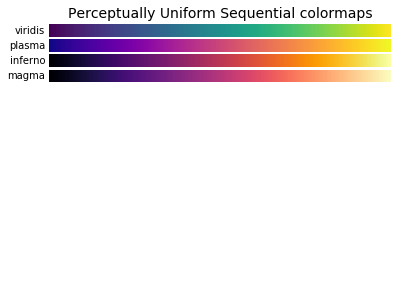

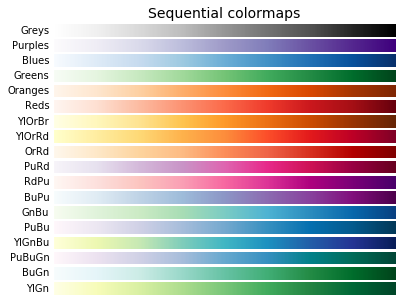

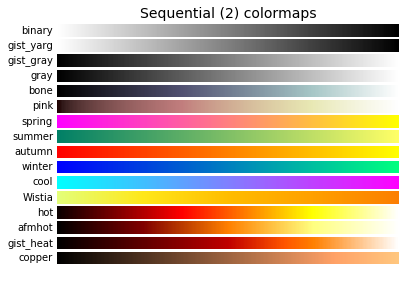

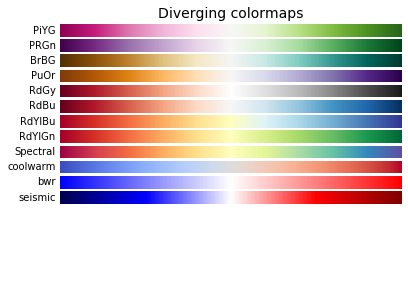

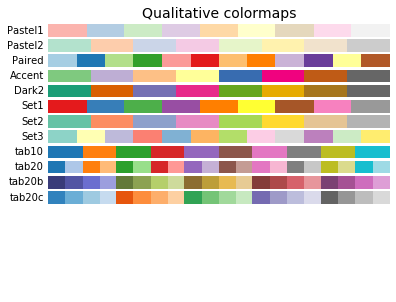

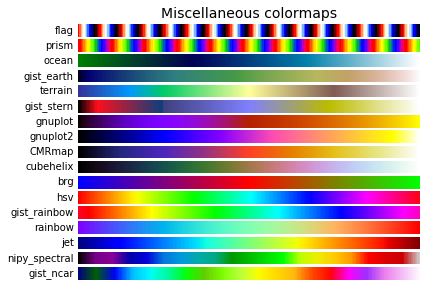

In [71]:
# %load http://matplotlib.org/mpl_examples/color/colormaps_reference.py
"""
==================
Colormap reference
==================

Reference for colormaps included with Matplotlib.

This reference example shows all colormaps included with Matplotlib. Note that
any colormap listed here can be reversed by appending "_r" (e.g., "pink_r").
These colormaps are divided into the following categories:

Sequential:
    These colormaps are approximately monochromatic colormaps varying smoothly
    between two color tones---usually from low saturation (e.g. white) to high
    saturation (e.g. a bright blue). Sequential colormaps are ideal for
    representing most scientific data since they show a clear progression from
    low-to-high values.

Diverging:
    These colormaps have a median value (usually light in color) and vary
    smoothly to two different color tones at high and low values. Diverging
    colormaps are ideal when your data has a median value that is significant
    (e.g.  0, such that positive and negative values are represented by
    different colors of the colormap).

Qualitative:
    These colormaps vary rapidly in color. Qualitative colormaps are useful for
    choosing a set of discrete colors. For example::

        color_list = plt.cm.Set3(np.linspace(0, 1, 12))

    gives a list of RGB colors that are good for plotting a series of lines on
    a dark background.

Miscellaneous:
    Colormaps that don't fit into the categories above.

"""
import numpy as np
import matplotlib.pyplot as plt


# Have colormaps separated into categories:
# http://matplotlib.org/examples/color/colormaps_reference.html
cmaps = [('Perceptually Uniform Sequential', [
            'viridis', 'plasma', 'inferno', 'magma']),
         ('Sequential', [
            'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']),
         ('Sequential (2)', [
            'binary', 'gist_yarg', 'gist_gray', 'gray', 'bone', 'pink',
            'spring', 'summer', 'autumn', 'winter', 'cool', 'Wistia',
            'hot', 'afmhot', 'gist_heat', 'copper']),
         ('Diverging', [
            'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu',
            'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']),
         ('Qualitative', [
            'Pastel1', 'Pastel2', 'Paired', 'Accent',
            'Dark2', 'Set1', 'Set2', 'Set3',
            'tab10', 'tab20', 'tab20b', 'tab20c']),
         ('Miscellaneous', [
            'flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern',
            'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg', 'hsv',
            'gist_rainbow', 'rainbow', 'jet', 'nipy_spectral', 'gist_ncar'])]


nrows = max(len(cmap_list) for cmap_category, cmap_list in cmaps)
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))


def plot_color_gradients(cmap_category, cmap_list, nrows):
    fig, axes = plt.subplots(nrows=nrows)
    fig.subplots_adjust(top=0.95, bottom=0.01, left=0.2, right=0.99)
    axes[0].set_title(cmap_category + ' colormaps', fontsize=14)

    for ax, name in zip(axes, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=plt.get_cmap(name))
        pos = list(ax.get_position().bounds)
        x_text = pos[0] - 0.01
        y_text = pos[1] + pos[3]/2.
        fig.text(x_text, y_text, name, va='center', ha='right', fontsize=10)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axes:
        ax.set_axis_off()


for cmap_category, cmap_list in cmaps:
    plot_color_gradients(cmap_category, cmap_list, nrows)

plt.show()